##SALES EDA
###PROBLEM STATEMENT :

An ABC company has the sales data for the last 3 years and they want to analyze it now.
There is a Dimension Data where there is the list of companies and their Line of Business. There are 3 years of sales data. There is also a Target Data.
Stakeholders want the following insights in the dashboard:
- Include important KPIs
- Sales over Time
-Sales for various Products
-Manager wise analysis
-Customer coverage across various Locations
-Target Analysis


In [1]:
import pandas as pd  #to work with data frames
import datetime as dt
from sqlalchemy import create_engine
import numpy as np  #used for numerical operations
import statistics as st #for statistical solutions
import matplotlib.pyplot as plt #used for visualization
import seaborn as sns  #used to visualization
import matplotlib.ticker as mtick


#UPLOADING THE DATASETS

In [2]:
sales_17 = pd.read_excel('Sales2017.xlsx') #reading the sales data set for the year 2017

In [3]:
sales_18 = pd.read_excel('Sales2018.xlsx') #READING THE SALES DATA SET FOR THE YEAR 2018

In [4]:
sales_19 = pd.read_excel('Sales2019.xlsx') #reading the data set for the year 2019

In [5]:
customers=pd.read_excel('DimensionTables.xlsx',0) #reading the dimensions data
products=pd.read_excel('DimensionTables.xlsx',1)
product_grp=pd.read_excel('DimensionTables.xlsx',2)
salesperson=pd.read_excel('DimensionTables.xlsx',3)
dates=pd.read_excel('DimensionTables.xlsx',4)

In [6]:
target= pd.read_excel('Target.xlsx',index_col=0) # reading the targets data



##DATA CLEANING
- **SALES_2017 DATA SET**

In [7]:
sales_17.head(9) #returns the first five rows of the table

,Issue Date,Due Date,Invoice Number,Customer ID,SalesPerson ID,Product ID,Qty Itens,Unit Price,Net Weight
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.60
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.40
2,2017-01-12,2017-02-22,1492762,3140218,265,264,10,0.96,1.92
3,2017-01-13,2017-01-29,1492719,2983332,265,1154,6,2.92,1.26
4,2017-01-13,2017-01-29,1492719,2983332,265,1527,6,2.81,1.40
5,2017-01-13,2017-01-29,1492719,2983332,265,1862,6,2.81,0.80
6,2017-01-13,2017-01-29,1492719,2983332,265,438,6,7.85,1.14
7,2017-01-13,2017-02-01,1493982,4623768,144,692,3,5.05,1.30
8,2017-01-13,2017-02-01,1493982,4623768,144,318,48,0.74,1.51


In [8]:
sales_17.rename(columns={'Qty Itens': 'Qty Items'}, inplace=True)

In [9]:
sales_17.shape #returns the number of rows and columns (r,c)

(91594, 9)

In [10]:
sales_17.info() #returns with the datatypes and non-null values present in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91594 entries, 0 to 91593
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Issue Date      91594 non-null  datetime64[ns]
 1   Due Date        91594 non-null  datetime64[ns]
 2   Invoice Number  91594 non-null  int64         
 3   Customer ID     91594 non-null  int64         
 4   SalesPerson ID  91594 non-null  int64         
 5   Product ID      91594 non-null  int64         
 6   Qty Items       91594 non-null  int64         
 7   Unit Price      91594 non-null  float64       
 8   Net Weight      91594 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(5)
memory usage: 6.3 MB


In [11]:
sales_17.isnull().sum() #gives the sum of null values present in each row

Issue Date        0
Due Date          0
Invoice Number    0
Customer ID       0
SalesPerson ID    0
Product ID        0
Qty Items         0
Unit Price        0
Net Weight        0
dtype: int64

In [12]:
sales_17.describe()  #returns the mean, median and data disperssion of eeach column

,Issue Date,Due Date,Invoice Number,Customer ID,SalesPerson ID,Product ID,Qty Items,Unit Price,Net Weight
count,91594,91594,9.159400e+04,9.159400e+04,91594.000000,91594.000000,91594.000000,91594.000000,91594.000000
mean,2017-08-11 07:21:42.766556672,2017-09-10 07:33:05.710854144,1.652316e+06,3.235100e+06,207.815163,1146.958436,23.662522,6.987051,4.528893
min,2017-01-12 00:00:00,2017-01-29 00:00:00,1.491303e+06,6.156600e+05,102.000000,108.000000,1.000000,0.300000,0.050000
25%,2017-06-04 00:00:00,2017-07-04 00:00:00,1.578408e+06,2.862151e+06,144.000000,370.000000,6.000000,1.630000,0.990000
50%,2017-08-16 00:00:00,2017-09-15 00:00:00,1.651500e+06,3.771379e+06,215.000000,1133.000000,12.000000,2.970000,1.400000
75%,2017-10-23 00:00:00,2017-11-22 00:00:00,1.726891e+06,4.088384e+06,265.000000,1839.000000,24.000000,4.660000,3.570000
max,2017-12-31 00:00:00,2018-02-14 00:00:00,1.858354e+06,5.504276e+06,669.000000,2571.000000,7200.000000,157.600000,3600.000000
std,NaN,NaN,9.246629e+04,1.432309e+06,78.351405,756.366876,63.884595,13.886034,20.562286


- **SALES_2018 DATA SET**

In [13]:
sales_18.head()

,Issue Date,Due Date,Invoice Number,Customer ID,SalesPerson ID,Product ID,Qty Itens,Unit Price,Net Weight
0,2018-01-01,2018-02-02,1822917,3787277,196,1154,6,3.11,0.30
1,2018-01-01,2018-02-12,1748367,673368,265,1154,6,3.11,0.30
2,2018-01-01,2018-01-27,1791138,671829,215,1154,6,3.04,1.26
3,2018-01-01,2018-01-16,1834054,2851340,125,1527,6,2.80,0.69
4,2018-01-01,2018-02-02,1822917,3787277,196,1527,6,3.00,0.69


In [14]:
sales_18.shape

(154254, 9)

In [15]:
sales_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154254 entries, 0 to 154253
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Issue Date      154254 non-null  datetime64[ns]
 1   Due Date        154254 non-null  datetime64[ns]
 2   Invoice Number  154254 non-null  int64         
 3   Customer ID     154254 non-null  int64         
 4   SalesPerson ID  154254 non-null  int64         
 5   Product ID      154254 non-null  int64         
 6   Qty Itens       154254 non-null  int64         
 7   Unit Price      154254 non-null  float64       
 8   Net Weight      154254 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(5)
memory usage: 10.6 MB


In [16]:
sales_18.isnull().sum()

Issue Date        0
Due Date          0
Invoice Number    0
Customer ID       0
SalesPerson ID    0
Product ID        0
Qty Itens         0
Unit Price        0
Net Weight        0
dtype: int64

In [17]:
sales_18.describe()

,Issue Date,Due Date,Invoice Number,Customer ID,SalesPerson ID,Product ID,Qty Itens,Unit Price,Net Weight
count,154254,154254,1.542540e+05,1.542540e+05,154254.000000,154254.000000,154254.000000,154254.000000,154254.000000
mean,2018-07-29 04:37:47.346065408,2018-08-28 01:33:43.555953152,2.001538e+06,3.388068e+06,223.194659,1338.035856,25.055026,6.634992,4.268966
min,2018-01-01 00:00:00,2018-01-16 00:00:00,1.735761e+06,6.156600e+05,102.000000,108.000000,1.000000,0.030000,0.050000
25%,2018-05-13 00:00:00,2018-06-11 00:00:00,1.919515e+06,2.882072e+06,144.000000,468.000000,6.000000,1.600000,0.990000
50%,2018-08-16 00:00:00,2018-09-15 00:00:00,2.015929e+06,3.784234e+06,215.000000,1417.000000,12.000000,2.910000,1.400000
75%,2018-10-22 00:00:00,2018-11-21 00:00:00,2.089030e+06,4.383760e+06,265.000000,2233.000000,24.000000,4.650000,3.520000
max,2018-12-31 00:00:00,2019-02-14 00:00:00,2.175208e+06,5.802078e+06,669.000000,2687.000000,9000.000000,197.040000,2400.000000
std,NaN,NaN,1.057525e+05,1.469038e+06,101.460848,857.724639,89.812107,14.727082,19.351197


- **SALES_2019 DATASET**

In [18]:
sales_19.head()

,Issue Date,Due Date,Invoice Number,Customer ID,SalesPerson ID,Product ID,Qty Itens,Unit Price,Net Weight
0,2019-01-01,2019-02-01,2123073,3785072,285,1154,6,3.25,0.30
1,2019-01-01,2019-02-08,2149604,3799504,326,1154,6,3.25,0.30
2,2019-01-01,2019-02-09,2173654,2957188,326,1154,6,3.20,0.30
3,2019-01-01,2019-01-21,2113210,3854414,326,1154,6,3.33,0.30
4,2019-01-01,2019-01-28,2156463,2950203,102,1154,6,2.62,1.38


In [19]:
sales_19.shape

(14248, 9)

In [20]:
sales_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14248 entries, 0 to 14247
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Issue Date      14248 non-null  datetime64[ns]
 1   Due Date        14248 non-null  datetime64[ns]
 2   Invoice Number  14248 non-null  int64         
 3   Customer ID     14248 non-null  int64         
 4   SalesPerson ID  14248 non-null  int64         
 5   Product ID      14248 non-null  int64         
 6   Qty Itens       14248 non-null  int64         
 7   Unit Price      14248 non-null  float64       
 8   Net Weight      14248 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(5)
memory usage: 1001.9 KB


In [21]:
sales_19.isnull().sum()

Issue Date        0
Due Date          0
Invoice Number    0
Customer ID       0
SalesPerson ID    0
Product ID        0
Qty Itens         0
Unit Price        0
Net Weight        0
dtype: int64

In [22]:
sales_19.describe()

,Issue Date,Due Date,Invoice Number,Customer ID,SalesPerson ID,Product ID,Qty Itens,Unit Price,Net Weight
count,14248,14248,1.424800e+04,1.424800e+04,14248.000000,14248.000000,14248.000000,14248.000000,14248.000000
mean,2019-01-24 10:18:37.798989568,2019-02-23 02:53:44.031442688,2.151120e+06,3.503853e+06,230.076783,1438.655811,24.493894,7.257629,4.313982
min,2019-01-01 00:00:00,2019-01-16 00:00:00,2.101254e+06,6.164330e+05,102.000000,114.000000,1.000000,0.330000,0.050000
25%,2019-01-10 00:00:00,2019-02-08 00:00:00,2.138866e+06,2.927806e+06,144.000000,581.000000,6.000000,1.640000,0.960000
50%,2019-01-21 00:00:00,2019-02-21 00:00:00,2.154089e+06,3.799549e+06,215.000000,1557.000000,11.000000,2.875000,1.400000
75%,2019-02-06 00:00:00,2019-03-08 00:00:00,2.167291e+06,4.768311e+06,285.000000,2272.000000,24.000000,4.820000,3.380000
max,2019-03-13 00:00:00,2019-04-25 00:00:00,2.175146e+06,5.806900e+06,669.000000,2685.000000,9000.000000,187.200000,3600.000000
std,NaN,NaN,1.835156e+04,1.475732e+06,116.855320,879.935528,112.972157,16.484457,32.925432



- **TARGET DATA SET**

- the data set has some NAN values and also '0' are included in the dataset which has to be removed

In [23]:
target.dropna(inplace=True) #removing all the null values and inplace =True will update the original data set too

In [24]:
target.isnull().sum()

Unnamed: 1     0
Unnamed: 2     0
Unnamed: 3     0
Unnamed: 4     0
Unnamed: 5     0
Unnamed: 6     0
Unnamed: 7     0
Unnamed: 8     0
Unnamed: 9     0
Unnamed: 10    0
Unnamed: 11    0
Unnamed: 12    0
Unnamed: 13    0
Unnamed: 14    0
Unnamed: 15    0
Unnamed: 16    0
Unnamed: 17    0
Unnamed: 18    0
Unnamed: 19    0
Unnamed: 20    0
Unnamed: 21    0
Unnamed: 22    0
Unnamed: 23    0
Unnamed: 24    0
dtype: int64

In [25]:
target.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
SalesPerson ID,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,...,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00
102,140768.312981,124258.753484,169509.931262,143465.231352,98423.627768,133401.861987,109124.992168,221597.228027,101603.974771,55255.942471,...,315935.618731,105568.51631,58743.776233,181830.392098,135931.360716,105977.016031,67048.978875,136594.459203,39370.133088,34296.939141
125,21525.584613,50778.518843,80286.310022,117769.05503,162043.205771,184889.338359,175629.570395,120097.495562,110607.719934,146219.270646,...,63898.4213,108730.296716,44662.552004,264250.812124,80597.535419,122250.986149,114977.701064,199905.37762,52701.549885,46867.563534
144,72301.437981,47360.51627,54145.357333,89457.661634,115437.266528,72356.845601,164689.100713,102330.724424,112396.578585,106251.30251,...,126463.216512,66398.357121,99162.551567,68546.309842,73499.767441,168450.039438,115770.331253,101263.109944,16718.894966,32769.773036
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,107117.669385,148042.387145,90060.231633,39364.546546,43339.557259


 - As the column names are in the second row, we need to remove the first row
 - **creating a variable called new header and assinging it will the header location inorder to make second row as header**

In [26]:
new_header=target.iloc[0]
target=target[1:]
target.columns = new_header

In [27]:
target.head()

SalesPerson ID,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,...,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01
102,140768.312981,124258.753484,169509.931262,143465.231352,98423.627768,133401.861987,109124.992168,221597.228027,101603.974771,55255.942471,...,315935.618731,105568.51631,58743.776233,181830.392098,135931.360716,105977.016031,67048.978875,136594.459203,39370.133088,34296.939141
125,21525.584613,50778.518843,80286.310022,117769.05503,162043.205771,184889.338359,175629.570395,120097.495562,110607.719934,146219.270646,...,63898.4213,108730.296716,44662.552004,264250.812124,80597.535419,122250.986149,114977.701064,199905.37762,52701.549885,46867.563534
144,72301.437981,47360.51627,54145.357333,89457.661634,115437.266528,72356.845601,164689.100713,102330.724424,112396.578585,106251.30251,...,126463.216512,66398.357121,99162.551567,68546.309842,73499.767441,168450.039438,115770.331253,101263.109944,16718.894966,32769.773036
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,107117.669385,148042.387145,90060.231633,39364.546546,43339.557259
196,75253.91149,56094.071733,156709.108284,82723.073158,47426.320283,66398.220086,91840.461612,136680.893152,87425.550099,143060.591184,...,99185.119353,43642.489333,73916.754356,114445.340468,76255.523468,138085.16373,58425.345277,67537.642857,10161.933261,10380.642211


-  **inorder to remove the time stamp we are using map function to get the columns in mmddyyyy format.**

In [28]:
# Reset index to move "SalesPerson ID" from index to a regular column
target_reset_index = target.reset_index()

# Change the format of the date columns to "mm yyyy"
target_reset_index.columns = ['SalesPerson ID'] + [col.strftime('%m %Y') for col in target_reset_index.columns[1:]]

# Print the DataFrame with the desired format
target_reset_index.head()




,SalesPerson ID,01 2017,02 2017,03 2017,04 2017,05 2017,06 2017,07 2017,08 2017,09 2017,...,03 2018,04 2018,05 2018,06 2018,07 2018,08 2018,09 2018,10 2018,11 2018,12 2018
0,102,140768.312981,124258.753484,169509.931262,143465.231352,98423.627768,133401.861987,109124.992168,221597.228027,101603.974771,...,315935.618731,105568.51631,58743.776233,181830.392098,135931.360716,105977.016031,67048.978875,136594.459203,39370.133088,34296.939141
1,125,21525.584613,50778.518843,80286.310022,117769.05503,162043.205771,184889.338359,175629.570395,120097.495562,110607.719934,...,63898.4213,108730.296716,44662.552004,264250.812124,80597.535419,122250.986149,114977.701064,199905.37762,52701.549885,46867.563534
2,144,72301.437981,47360.51627,54145.357333,89457.661634,115437.266528,72356.845601,164689.100713,102330.724424,112396.578585,...,126463.216512,66398.357121,99162.551567,68546.309842,73499.767441,168450.039438,115770.331253,101263.109944,16718.894966,32769.773036
3,194,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,107117.669385,148042.387145,90060.231633,39364.546546,43339.557259
4,196,75253.91149,56094.071733,156709.108284,82723.073158,47426.320283,66398.220086,91840.461612,136680.893152,87425.550099,...,99185.119353,43642.489333,73916.754356,114445.340468,76255.523468,138085.16373,58425.345277,67537.642857,10161.933261,10380.642211


In [29]:
targets = target_reset_index.set_index('SalesPerson ID')
targets.head()


,01 2017,02 2017,03 2017,04 2017,05 2017,06 2017,07 2017,08 2017,09 2017,10 2017,...,03 2018,04 2018,05 2018,06 2018,07 2018,08 2018,09 2018,10 2018,11 2018,12 2018
SalesPerson ID,,,,,,,,,,,,,,,,,,,,,
102,140768.312981,124258.753484,169509.931262,143465.231352,98423.627768,133401.861987,109124.992168,221597.228027,101603.974771,55255.942471,...,315935.618731,105568.51631,58743.776233,181830.392098,135931.360716,105977.016031,67048.978875,136594.459203,39370.133088,34296.939141
125,21525.584613,50778.518843,80286.310022,117769.05503,162043.205771,184889.338359,175629.570395,120097.495562,110607.719934,146219.270646,...,63898.4213,108730.296716,44662.552004,264250.812124,80597.535419,122250.986149,114977.701064,199905.37762,52701.549885,46867.563534
144,72301.437981,47360.51627,54145.357333,89457.661634,115437.266528,72356.845601,164689.100713,102330.724424,112396.578585,106251.30251,...,126463.216512,66398.357121,99162.551567,68546.309842,73499.767441,168450.039438,115770.331253,101263.109944,16718.894966,32769.773036
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,107117.669385,148042.387145,90060.231633,39364.546546,43339.557259
196,75253.91149,56094.071733,156709.108284,82723.073158,47426.320283,66398.220086,91840.461612,136680.893152,87425.550099,143060.591184,...,99185.119353,43642.489333,73916.754356,114445.340468,76255.523468,138085.16373,58425.345277,67537.642857,10161.933261,10380.642211


In [30]:
targets.shape

(11, 24)

- **customers data set**

In [31]:
customers.head()

,Customer ID,Company Name,Status,Line of Business,City,State
0,1339104,Dwarf Acoustics,A,Canteens,Winthrop,WA
1,1339740,Fire Softwares,A,Canteens,Winthrop,WA
2,1339884,Granite Intelligence,A,Canteens,Winthrop,WA
3,1340322,Thorecords,A,Canteens,Winthrop,WA
4,4837795,Green-Plus,A,Canteens,Winthrop,WA


In [32]:
customers.shape

(1411, 6)

In [33]:
customers.isnull().sum()

Customer ID         0
Company Name        0
Status              0
Line of Business    0
City                0
State               0
dtype: int64

In [34]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411 entries, 0 to 1410
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Customer ID       1411 non-null   int64 
 1   Company Name      1411 non-null   object
 2   Status            1411 non-null   object
 3   Line of Business  1411 non-null   object
 4   City              1411 non-null   object
 5   State             1411 non-null   object
dtypes: int64(1), object(5)
memory usage: 66.3+ KB


- **products data set**

In [35]:
products.head()

,Product ID,Product,Group ID
0,1,Product 1,9999
1,2,Product 2,9999
2,3,Product 3,9999
3,4,Product 4,9999
4,5,Product 5,9999


In [36]:
products.shape

(2736, 3)

In [37]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Product ID  2736 non-null   int64 
 1   Product     2736 non-null   object
 2   Group ID    2736 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 64.2+ KB


- **product_grp data set**

In [38]:
product_grp.head()

,Group ID,Group,Category
0,102,Powdered Milk,Food
1,103,Sugars,Food
2,104,Canned Sweets,Food
3,105,Flours,Food
4,106,Oils,Food


In [39]:
product_grp.shape

(36, 3)

In [40]:
product_grp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Group ID  36 non-null     int64 
 1   Group     36 non-null     object
 2   Category  36 non-null     object
dtypes: int64(1), object(2)
memory usage: 992.0+ bytes


In [41]:
product_grp.isnull().sum()

Group ID    0
Group       0
Category    0
dtype: int64


- **salesperson data set**


In [42]:
salesperson.head()

,SalesPerson ID,SalesPerson,Supervisor ID,Supervisor,Manager ID,Manager,Team
0,669,Ayaana Mackenzie,15,Jonathon Childs,1,Ronnie Daly,Retail
1,660,Tess Sanderson,25,Jessica Valentine,1,Ronnie Daly,Retail
2,183,Hywel Hopkins,25,Jessica Valentine,1,Ronnie Daly,Retail
3,102,Serenity Rich,25,Jessica Valentine,1,Ronnie Daly,Retail
4,196,Gillian Gonzales,30,Sarah-Jayne Pennington,1,Ronnie Daly,Retail


In [43]:
salesperson.shape

(12, 7)

In [44]:
salesperson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SalesPerson ID  12 non-null     int64 
 1   SalesPerson     12 non-null     object
 2   Supervisor ID   12 non-null     int64 
 3   Supervisor      12 non-null     object
 4   Manager ID      12 non-null     int64 
 5   Manager         12 non-null     object
 6   Team            12 non-null     object
dtypes: int64(3), object(4)
memory usage: 800.0+ bytes


- **dates dataset**

In [45]:
dates.head()

,Dates,Year,Month Name,Month,Day
0,2017-01-01,2017,January,1,1
1,2017-01-02,2017,January,1,2
2,2017-01-03,2017,January,1,3
3,2017-01-04,2017,January,1,4
4,2017-01-05,2017,January,1,5


In [46]:
dates.shape

(1095, 5)

In [47]:
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Dates       1095 non-null   datetime64[ns]
 1   Year        1095 non-null   int64         
 2   Month Name  1095 non-null   object        
 3   Month       1095 non-null   int64         
 4   Day         1095 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 42.9+ KB


#EDA
- PERFORMING UNIVARIATE AND BIVARIATE ANALYSIS ON 2017 SALES DATA

In [48]:
sales_17.head()

,Issue Date,Due Date,Invoice Number,Customer ID,SalesPerson ID,Product ID,Qty Items,Unit Price,Net Weight
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.60
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.40
2,2017-01-12,2017-02-22,1492762,3140218,265,264,10,0.96,1.92
3,2017-01-13,2017-01-29,1492719,2983332,265,1154,6,2.92,1.26
4,2017-01-13,2017-01-29,1492719,2983332,265,1527,6,2.81,1.40


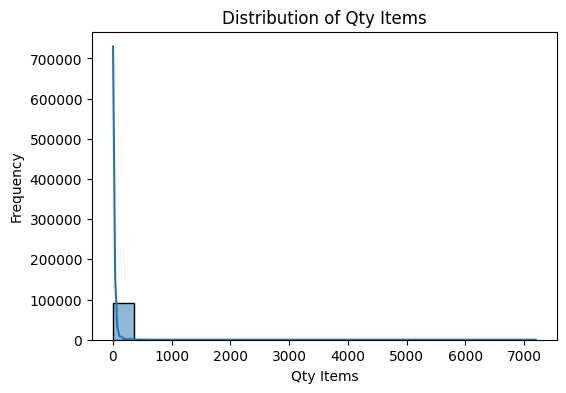

In [49]:
plt.figure(figsize=(6,4))
sns.histplot(sales_17['Qty Items'], bins=20, kde=True)
plt.title('Distribution of Qty Items')
plt.xlabel('Qty Items')
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='Qty Items'>

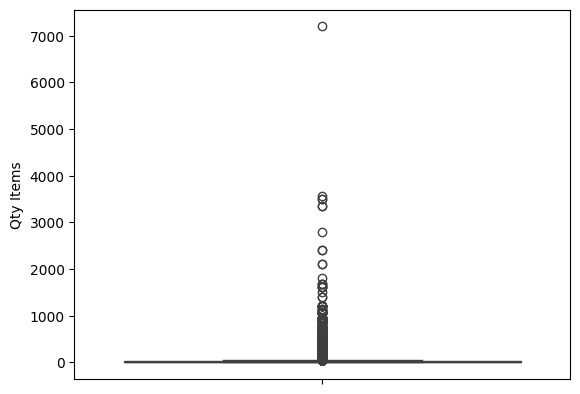

In [50]:
sns.boxplot(y=sales_17['Qty Items'])

- there are very few outliers

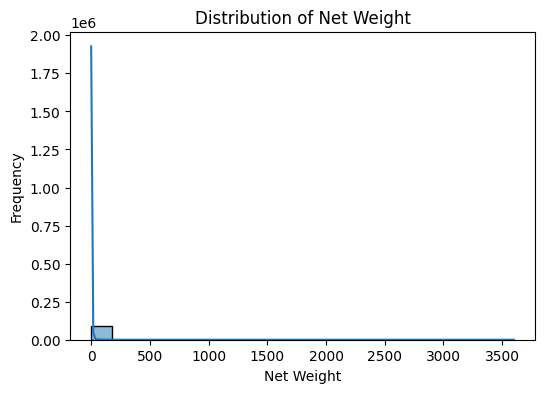

In [51]:
plt.figure(figsize=(6,4))
sns.histplot(sales_17['Net Weight'], bins=20, kde=True)
plt.title('Distribution of Net Weight')
plt.xlabel('Net Weight')
plt.ylabel('Frequency')
plt.show()

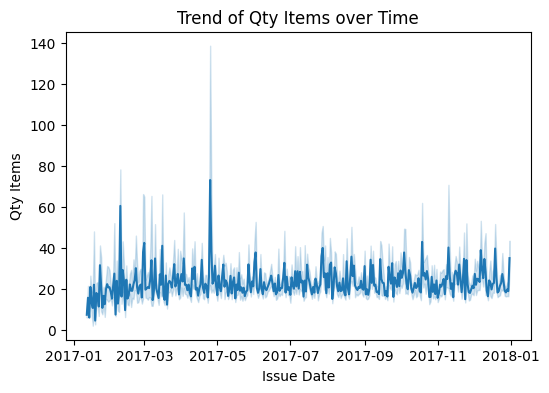

In [52]:
# Visualize trends over time
sales_17['Issue Date'] = pd.to_datetime(sales_17['Issue Date'])
plt.figure(figsize=(6,4))
sns.lineplot(x='Issue Date', y='Qty Items', data=sales_17)
plt.title('Trend of Qty Items over Time')
plt.xlabel('Issue Date')
plt.ylabel('Qty Items')
plt.show()

-  there is a general trend of increasing sales over the course of the year.
- An occassional increase in trend can be seen in the months of February and May.

##**Creating a new feature 'Total Sales' by multiplying 'Qty Items' and 'Unit Price'**

In [53]:
sales_17['Total Sales'] = sales_17['Qty Items'] * sales_17['Unit Price']


In [54]:
sales_17.head()

,Issue Date,Due Date,Invoice Number,Customer ID,SalesPerson ID,Product ID,Qty Items,Unit Price,Net Weight,Total Sales
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.60,52.98
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.40,26.64
2,2017-01-12,2017-02-22,1492762,3140218,265,264,10,0.96,1.92,9.60
3,2017-01-13,2017-01-29,1492719,2983332,265,1154,6,2.92,1.26,17.52
4,2017-01-13,2017-01-29,1492719,2983332,265,1527,6,2.81,1.40,16.86


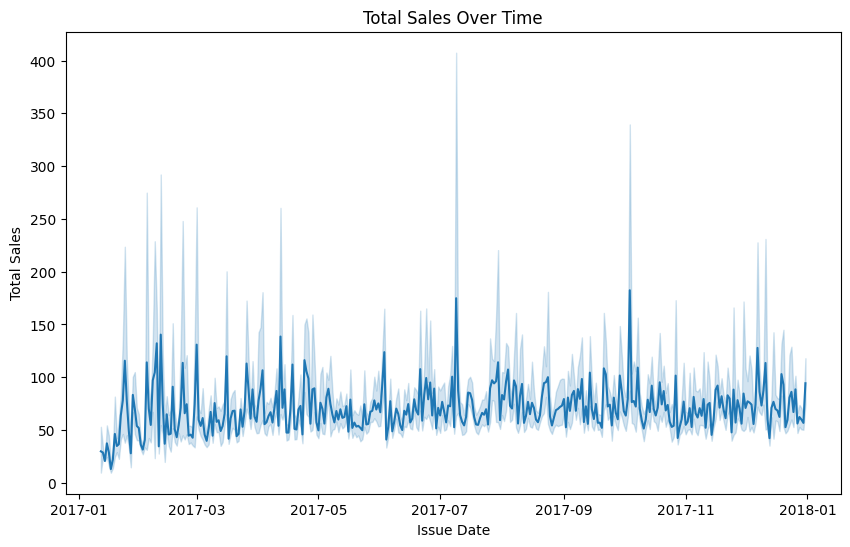

In [55]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_17, x='Issue Date', y='Total Sales')
plt.title('Total Sales Over Time')
plt.xlabel('Issue Date')
plt.ylabel('Total Sales')
plt.show()


- There is a continous increasing trend in the total sales over period of times. These periods may correspond with particular marketing campaigns, product launches, or external factors impacting consumer demand.
- The sales were high in june and october.


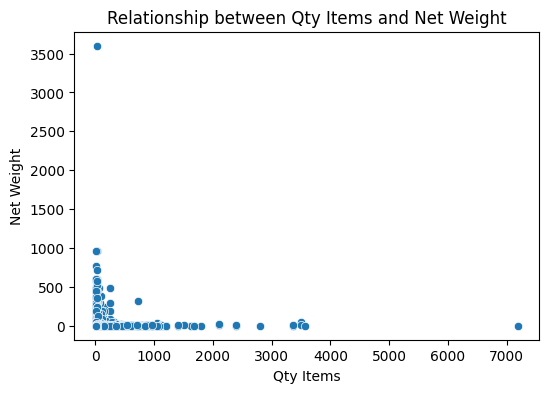

In [56]:
# Visualize relationships
plt.figure(figsize=(6,4))
sns.scatterplot(x='Qty Items', y='Net Weight', data=sales_17)
plt.title('Relationship between Qty Items and Net Weight')
plt.xlabel('Qty Items')
plt.ylabel('Net Weight')
plt.show()

-

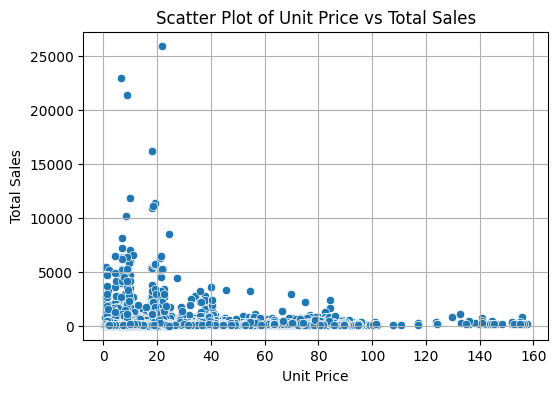

In [57]:
 #Plotting a scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Unit Price', y='Total Sales', data=sales_17)
plt.title('Scatter Plot of Unit Price vs Total Sales')
plt.xlabel('Unit Price')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [58]:
# Group the data by SalesPerson ID and calculate total sales
total_sales_by_salesperson = sales_17.groupby('SalesPerson ID')['Total Sales'].sum().reset_index()




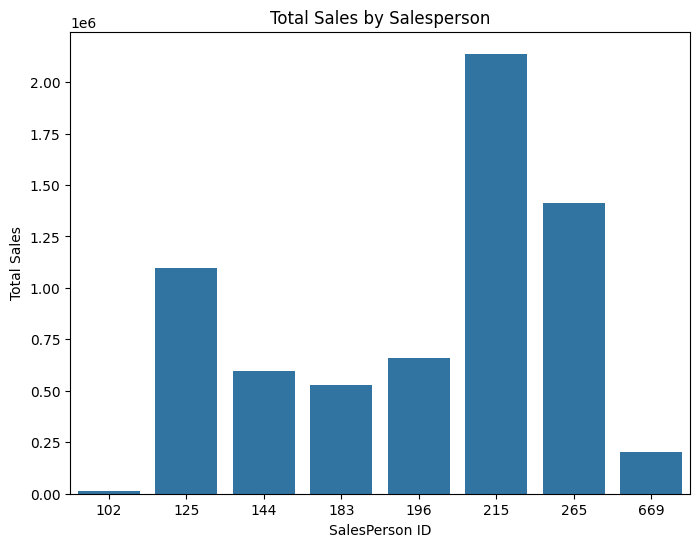

In [59]:
# Visualize the total sales by each salesperson
plt.figure(figsize=(8, 6))
sns.barplot(x='SalesPerson ID', y='Total Sales', data=total_sales_by_salesperson)
plt.title('Total Sales by Salesperson')
plt.xlabel('SalesPerson ID')
plt.ylabel('Total Sales')
plt.show()

###the total sales given by each sales
- Sales ID 102 achieved the lowest sales, while Sales ID 215 secured the highest with 265, followed by 125.

##comparing the target sales and total sales

In [60]:
sales_17.head()

,Issue Date,Due Date,Invoice Number,Customer ID,SalesPerson ID,Product ID,Qty Items,Unit Price,Net Weight,Total Sales
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.60,52.98
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.40,26.64
2,2017-01-12,2017-02-22,1492762,3140218,265,264,10,0.96,1.92,9.60
3,2017-01-13,2017-01-29,1492719,2983332,265,1154,6,2.92,1.26,17.52
4,2017-01-13,2017-01-29,1492719,2983332,265,1527,6,2.81,1.40,16.86


- To streamline the sales analysis for 2017, we remove columns that are not pertinent to the analysis.

In [61]:
targets.head()


,01 2017,02 2017,03 2017,04 2017,05 2017,06 2017,07 2017,08 2017,09 2017,10 2017,...,03 2018,04 2018,05 2018,06 2018,07 2018,08 2018,09 2018,10 2018,11 2018,12 2018
SalesPerson ID,,,,,,,,,,,,,,,,,,,,,
102,140768.312981,124258.753484,169509.931262,143465.231352,98423.627768,133401.861987,109124.992168,221597.228027,101603.974771,55255.942471,...,315935.618731,105568.51631,58743.776233,181830.392098,135931.360716,105977.016031,67048.978875,136594.459203,39370.133088,34296.939141
125,21525.584613,50778.518843,80286.310022,117769.05503,162043.205771,184889.338359,175629.570395,120097.495562,110607.719934,146219.270646,...,63898.4213,108730.296716,44662.552004,264250.812124,80597.535419,122250.986149,114977.701064,199905.37762,52701.549885,46867.563534
144,72301.437981,47360.51627,54145.357333,89457.661634,115437.266528,72356.845601,164689.100713,102330.724424,112396.578585,106251.30251,...,126463.216512,66398.357121,99162.551567,68546.309842,73499.767441,168450.039438,115770.331253,101263.109944,16718.894966,32769.773036
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,107117.669385,148042.387145,90060.231633,39364.546546,43339.557259
196,75253.91149,56094.071733,156709.108284,82723.073158,47426.320283,66398.220086,91840.461612,136680.893152,87425.550099,143060.591184,...,99185.119353,43642.489333,73916.754356,114445.340468,76255.523468,138085.16373,58425.345277,67537.642857,10161.933261,10380.642211


In [62]:
targets.columns

Index(['01 2017', '02 2017', '03 2017', '04 2017', '05 2017', '06 2017',
       '07 2017', '08 2017', '09 2017', '10 2017', '11 2017', '12 2017',
       '01 2018', '02 2018', '03 2018', '04 2018', '05 2018', '06 2018',
       '07 2018', '08 2018', '09 2018', '10 2018', '11 2018', '12 2018'],
      dtype='object')

In [63]:
cols=[  '01 2018', '02 2018', '03 2018', '04 2018', '05 2018',
       '06 2018', '07 2018', '08 2018', '09 2018', '10 2018', '11 2018',
       '12 2018']

In [64]:
targets.drop(columns=cols,axis=1) #drop fuction used to remove columns

,01 2017,02 2017,03 2017,04 2017,05 2017,06 2017,07 2017,08 2017,09 2017,10 2017,11 2017,12 2017
SalesPerson ID,,,,,,,,,,,,
102,140768.312981,124258.753484,169509.931262,143465.231352,98423.627768,133401.861987,109124.992168,221597.228027,101603.974771,55255.942471,261910.628582,171050.965613
125,21525.584613,50778.518843,80286.310022,117769.05503,162043.205771,184889.338359,175629.570395,120097.495562,110607.719934,146219.270646,69770.204547,182360.781748
144,72301.437981,47360.51627,54145.357333,89457.661634,115437.266528,72356.845601,164689.100713,102330.724424,112396.578585,106251.30251,68987.311215,78735.894253
194,0,0,0,0,0,0,0,0,0,0,0,0
196,75253.91149,56094.071733,156709.108284,82723.073158,47426.320283,66398.220086,91840.461612,136680.893152,87425.550099,143060.591184,75032.877494,192859.716422
215,286012.89817,268739.946775,329813.357769,159143.4362,117572.134697,275378.65914,253013.473041,329668.760958,97924.044778,146035.933463,434640.236282,303755.073529
265,122199.726847,147007.556793,127262.128128,206980.493152,119509.500049,192623.286112,181088.252276,157470.576836,142684.494598,229701.306681,261398.861558,195199.017321
285,0,0,0,0,0,39276.029666,35473.272722,73454.098387,36858.82009,75760.574409,114750.804667,90021.561718
326,0,0,0,0,0,0,0,0,0,0,0,0


- transposing the target data in order to get significant information from dataset

In [65]:
target_transposed = targets.transpose()
target_transposed.head()


SalesPerson ID,102,125,144,194,196,215,265,285,326,660,669
01 2017,140768.312981,21525.584613,72301.437981,0,75253.91149,286012.89817,122199.726847,0,0,0,0
02 2017,124258.753484,50778.518843,47360.51627,0,56094.071733,268739.946775,147007.556793,0,0,0,0
03 2017,169509.931262,80286.310022,54145.357333,0,156709.108284,329813.357769,127262.128128,0,0,0,0
04 2017,143465.231352,117769.05503,89457.661634,0,82723.073158,159143.4362,206980.493152,0,0,0,0
05 2017,98423.627768,162043.205771,115437.266528,0,47426.320283,117572.134697,119509.500049,0,0,0,0


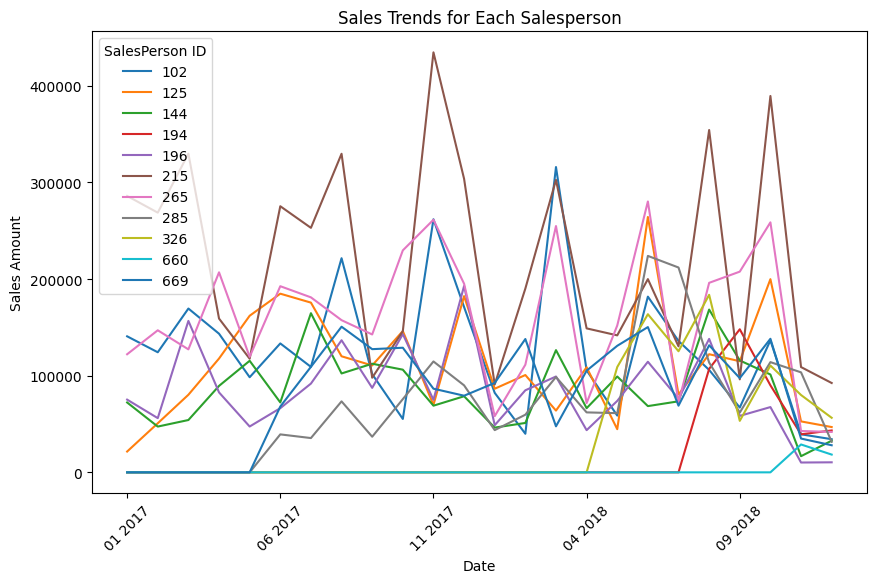

In [66]:
target_transposed.plot(figsize=(10, 6))
plt.title('Sales Trends for Each Salesperson')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='SalesPerson ID')
plt.show()

In [67]:
sales_17.head()

,Issue Date,Due Date,Invoice Number,Customer ID,SalesPerson ID,Product ID,Qty Items,Unit Price,Net Weight,Total Sales
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.60,52.98
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.40,26.64
2,2017-01-12,2017-02-22,1492762,3140218,265,264,10,0.96,1.92,9.60
3,2017-01-13,2017-01-29,1492719,2983332,265,1154,6,2.92,1.26,17.52
4,2017-01-13,2017-01-29,1492719,2983332,265,1527,6,2.81,1.40,16.86


In [68]:
# Calculate total sales for each SalesPerson ID in sales_17
total_sales_17 = sales_17.groupby('SalesPerson ID')['Total Sales'].sum().reset_index()

total_sales_17

,SalesPerson ID,Total Sales
0,102,11306.52
1,125,1094448.96
2,144,597801.77
3,183,528308.66
4,196,660110.46
5,215,2137785.43
6,265,1414154.17
7,669,204306.08


In [69]:
total_sales_17.columns



Index(['SalesPerson ID', 'Total Sales'], dtype='object')

In [70]:
total_sales_17.set_index('SalesPerson ID', inplace=True)


In [71]:
total_sales_17

,Total Sales
SalesPerson ID,
102,11306.52
125,1094448.96
144,597801.77
183,528308.66
196,660110.46
215,2137785.43
265,1414154.17
669,204306.08


In [72]:
target_transposed.head()

SalesPerson ID,102,125,144,194,196,215,265,285,326,660,669
01 2017,140768.312981,21525.584613,72301.437981,0,75253.91149,286012.89817,122199.726847,0,0,0,0
02 2017,124258.753484,50778.518843,47360.51627,0,56094.071733,268739.946775,147007.556793,0,0,0,0
03 2017,169509.931262,80286.310022,54145.357333,0,156709.108284,329813.357769,127262.128128,0,0,0,0
04 2017,143465.231352,117769.05503,89457.661634,0,82723.073158,159143.4362,206980.493152,0,0,0,0
05 2017,98423.627768,162043.205771,115437.266528,0,47426.320283,117572.134697,119509.500049,0,0,0,0


In [73]:
# Calculate total sales for each salesperson from target_transposed
target_sales = target_transposed.sum(axis=0)
target_sales

SalesPerson ID
102     3033854.44781
125    2708056.704558
144    2050895.557373
194     427924.391968
196    2037216.814025
215     5247942.73342
265    3830827.760424
285    1651439.504868
326     881940.536748
660      47213.390338
669     1914090.38347
dtype: object

In [74]:
# Extract SalesPerson IDs and total sales from total_sales_17 dataset
salesperson_ids = sales_17['SalesPerson ID']


In [75]:
total_sales = sales_17['Total Sales']

In [77]:
total_sales = target_transposed.sum(axis=0)
total_sales_sorted = total_sales.sort_values(ascending=False)
total_sales_sorted

SalesPerson ID
215     5247942.73342
265    3830827.760424
102     3033854.44781
125    2708056.704558
144    2050895.557373
196    2037216.814025
669     1914090.38347
285    1651439.504868
326     881940.536748
194     427924.391968
660      47213.390338
dtype: object

In [78]:
top_salespersons = total_sales_sorted.head(5)
print("Top Performing Salespersons:")
print(top_salespersons)

Top Performing Salespersons:
SalesPerson ID
215     5247942.73342
265    3830827.760424
102     3033854.44781
125    2708056.704558
144    2050895.557373
dtype: object


In [80]:
sales_17.head()

,Issue Date,Due Date,Invoice Number,Customer ID,SalesPerson ID,Product ID,Qty Items,Unit Price,Net Weight,Total Sales
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.60,52.98
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.40,26.64
2,2017-01-12,2017-02-22,1492762,3140218,265,264,10,0.96,1.92,9.60
3,2017-01-13,2017-01-29,1492719,2983332,265,1154,6,2.92,1.26,17.52
4,2017-01-13,2017-01-29,1492719,2983332,265,1527,6,2.81,1.40,16.86


In [81]:
products.head()

,Product ID,Product,Group ID
0,1,Product 1,9999
1,2,Product 2,9999
2,3,Product 3,9999
3,4,Product 4,9999
4,5,Product 5,9999


In [82]:
#merging data on product id
merged_data = pd.merge(sales_17, products, on='Product ID', how='left')

In [83]:
#Calculate total sales for each product
product_sales = merged_data.groupby(['Product ID', 'Product', 'Group ID'])['Total Sales'].sum().reset_index()

In [84]:

# Find the product with the highest total sales
most_sold_product = product_sales.loc[product_sales['Total Sales'].idxmax()]
most_sold_product

Product ID             2026
Product        Product 2026
Group ID                118
Total Sales       308568.24
Name: 354, dtype: object

In [85]:
most_sold_product_id = most_sold_product['Product ID']
most_sold_product_group = most_sold_product['Group ID']
print("Most Sold Product:")
print("Product ID:", most_sold_product_id)
print("Group ID:", most_sold_product_group)

Most Sold Product:
Product ID: 2026
Group ID: 118


In [154]:
# Sort the products by total sales in descending order
product_sales = product_sales.sort_values(by='Total Sales', ascending=False)
product_sales


,Product ID,Product,Group ID,Total Sales
281,1968,Product 1968,110,431749.70
510,2445,Product 2445,110,409327.44
90,662,Product 662,105,275514.08
404,2233,Product 2233,106,248351.70
304,2026,Product 2026,118,245509.56
...,...,...,...,...
478,2398,Product 2398,210,25.72
387,2210,Product 2210,114,25.12
116,881,Product 881,112,19.55
394,2220,Product 2220,210,15.55


In [87]:
product_grp.head()

,Group ID,Group,Category
0,102,Powdered Milk,Food
1,103,Sugars,Food
2,104,Canned Sweets,Food
3,105,Flours,Food
4,106,Oils,Food


In [88]:

# Merge with product group data
sales_with_product_and_group_info = pd.merge(product_sales, product_grp, on='Group ID', how='left')

In [89]:
product_sales_2017 = sales_with_product_and_group_info.groupby(['Product ID', 'Product', 'Group']).agg({'Total Sales': 'sum'}).reset_index()
# Sort the product_sales_2017 DataFrame in descending order based on Total Sales
product_sales_2017_sorted = product_sales_2017.sort_values(by='Total Sales', ascending=False)
product_sales_2017_sorted

,Product ID,Product,Group,Total Sales
354,2026,Product 2026,Sweets,308568.24
88,662,Product 662,Flours,228025.78
328,1968,Product 1968,Wheat Flours,221828.55
321,1948,Product 1948,Sweets,121513.78
460,2233,Product 2233,Oils,120168.70
...,...,...,...,...
563,2448,Product 2448,Sugarcane Liquor,27.41
548,2429,Product 2429,Sugarcane Liquor,25.80
386,2090,Product 2090,Sugarcane Liquor,21.10
274,1834,Product 1834,Sprinkles,20.22


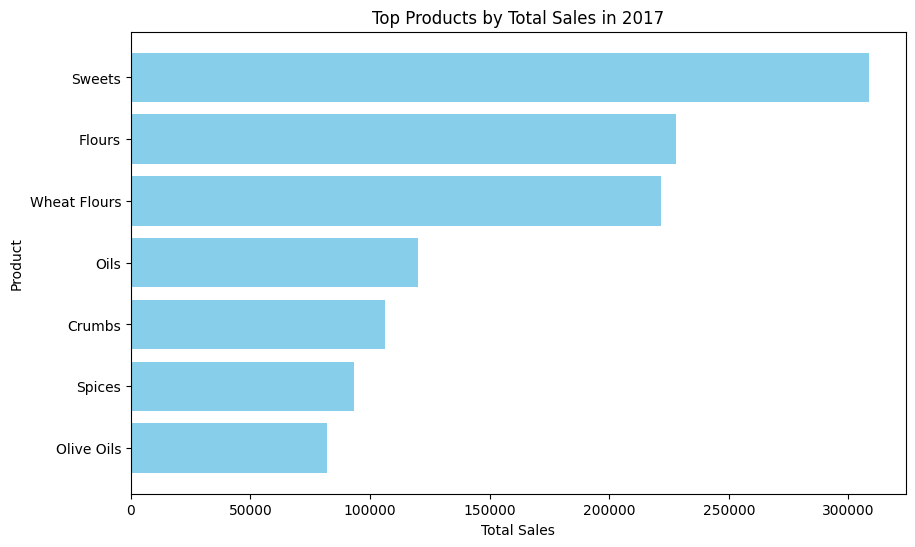

In [90]:
# Get the top N products with the most sales
top_products = product_sales_2017_sorted.head(10)  # Adjust the number of products as needed

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_products['Group'], top_products['Total Sales'], color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.title('Top Products by Total Sales in 2017')
plt.gca().invert_yaxis()  # Invert y-axis to display the product with the highest sales at the top
plt.show()

- sweets and flours are the most sold items for the year 2017

- sales_18

In [91]:
sales_18.rename(columns={'Qty Itens': 'Qty Items'}, inplace=True)
sales_18.head()

,Issue Date,Due Date,Invoice Number,Customer ID,SalesPerson ID,Product ID,Qty Items,Unit Price,Net Weight
0,2018-01-01,2018-02-02,1822917,3787277,196,1154,6,3.11,0.30
1,2018-01-01,2018-02-12,1748367,673368,265,1154,6,3.11,0.30
2,2018-01-01,2018-01-27,1791138,671829,215,1154,6,3.04,1.26
3,2018-01-01,2018-01-16,1834054,2851340,125,1527,6,2.80,0.69
4,2018-01-01,2018-02-02,1822917,3787277,196,1527,6,3.00,0.69


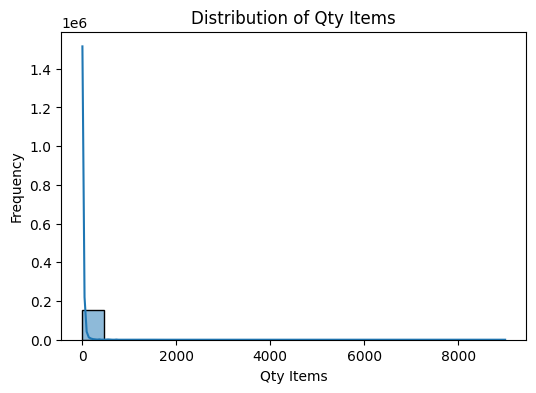

In [92]:
plt.figure(figsize=(6,4))
sns.histplot(sales_18['Qty Items'], bins=20, kde=True)
plt.title('Distribution of Qty Items')
plt.xlabel('Qty Items')
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='Qty Items'>

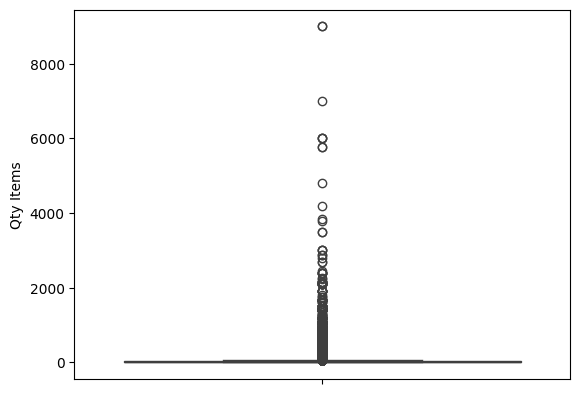

In [93]:
sns.boxplot(sales_18['Qty Items'])

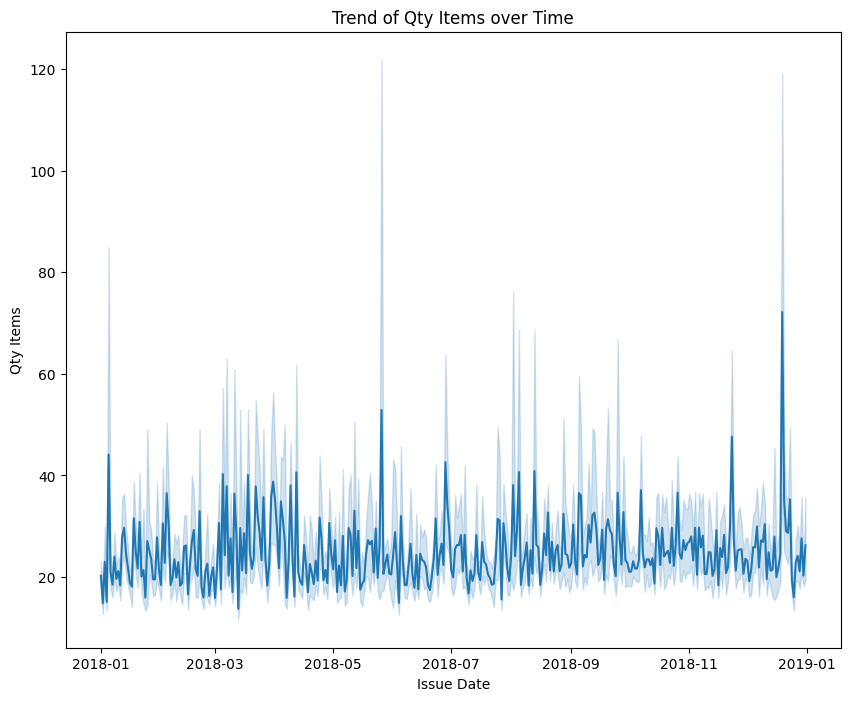

In [94]:
# Visualize trends over time
sales_18['Issue Date'] = pd.to_datetime(sales_18['Issue Date'])
plt.figure(figsize=(10,8))
sns.lineplot(x='Issue Date', y='Qty Items', data=sales_18)
plt.title('Trend of Qty Items over Time')
plt.xlabel('Issue Date')
plt.ylabel('Qty Items')
plt.show()

In [95]:
sales_18['Total Sales'] = sales_18['Qty Items'] * sales_18['Unit Price']
sales_18.head()

,Issue Date,Due Date,Invoice Number,Customer ID,SalesPerson ID,Product ID,Qty Items,Unit Price,Net Weight,Total Sales
0,2018-01-01,2018-02-02,1822917,3787277,196,1154,6,3.11,0.30,18.66
1,2018-01-01,2018-02-12,1748367,673368,265,1154,6,3.11,0.30,18.66
2,2018-01-01,2018-01-27,1791138,671829,215,1154,6,3.04,1.26,18.24
3,2018-01-01,2018-01-16,1834054,2851340,125,1527,6,2.80,0.69,16.80
4,2018-01-01,2018-02-02,1822917,3787277,196,1527,6,3.00,0.69,18.00


In [96]:
total_sales_18_by_salesperson = sales_18.groupby('SalesPerson ID')['Total Sales'].sum().reset_index()


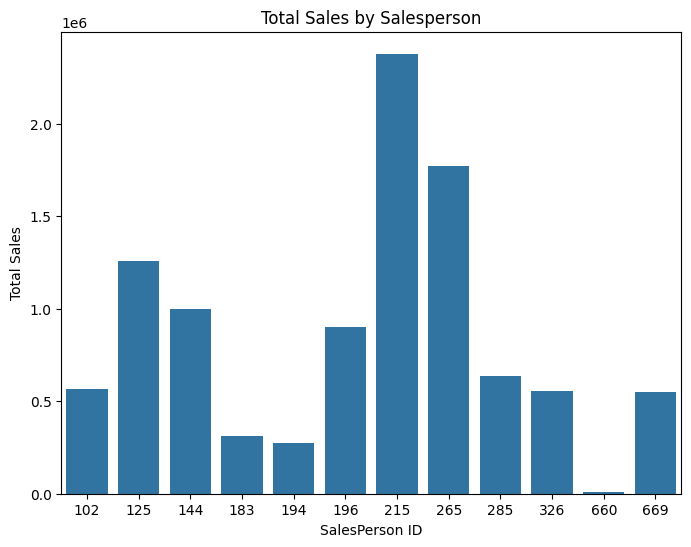

In [97]:
# Visualize the total sales by each salesperson
plt.figure(figsize=(8, 6))
sns.barplot(x='SalesPerson ID', y='Total Sales', data=total_sales_18_by_salesperson)
plt.title('Total Sales by Salesperson')
plt.xlabel('SalesPerson ID')
plt.ylabel('Total Sales')
plt.show()

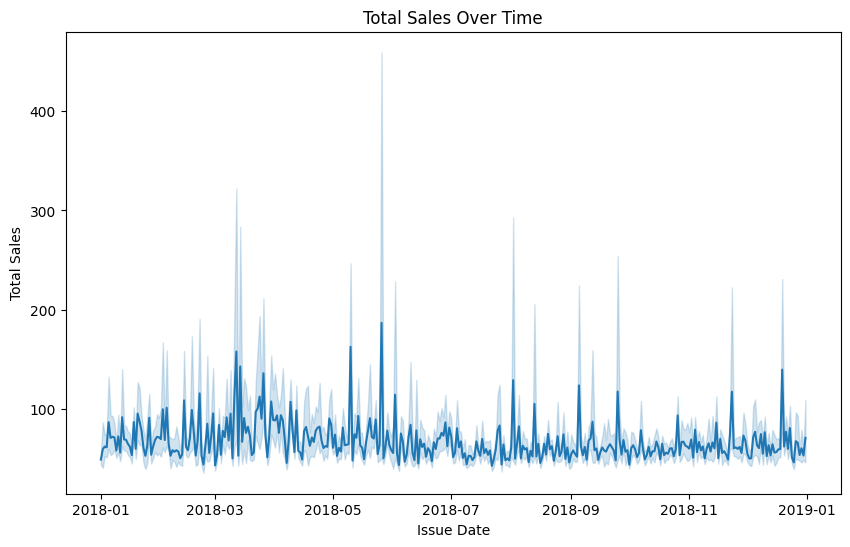

In [98]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_18, x='Issue Date', y='Total Sales')
plt.title('Total Sales Over Time')
plt.xlabel('Issue Date')
plt.ylabel('Total Sales')
plt.show()

- sales are high in the months of march ,may,june

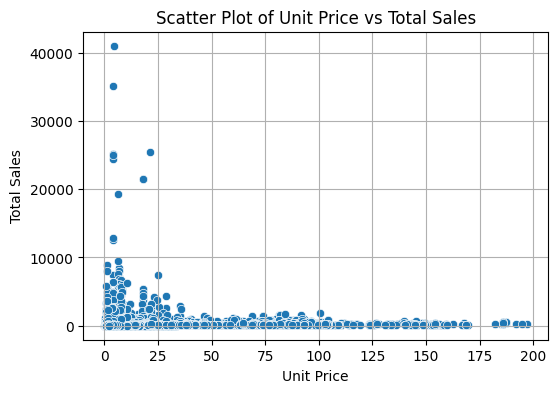

In [102]:
 #Plotting a scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Unit Price', y='Total Sales', data=sales_18)
plt.title('Scatter Plot of Unit Price vs Total Sales')
plt.xlabel('Unit Price')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [104]:
products.head()

,Product ID,Product,Group ID
0,1,Product 1,9999
1,2,Product 2,9999
2,3,Product 3,9999
3,4,Product 4,9999
4,5,Product 5,9999


In [106]:
#merging data on product id
merged_data_18 = pd.merge(sales_18, products, on='Product ID', how='left')

In [115]:

#Calculate total sales for each product
product_sales_18 = merged_data_18.groupby(['Product ID', 'Product', 'Group ID'])['Total Sales'].sum().reset_index()

In [109]:
# Find the product with the highest total sales
most_sold_product_18 = product_sales.loc[product_sales['Total Sales'].idxmax()]
most_sold_product_18


Product ID             1968
Product        Product 1968
Group ID                110
Total Sales        431749.7
Name: 281, dtype: object

In [110]:
most_sold_product_id_18 = most_sold_product_18['Product ID']
most_sold_product_group_18 = most_sold_product_18['Group ID']
print("Most Sold Product:")
print("Product ID:", most_sold_product_id_18)
print("Group ID:", most_sold_product_group_18)

Most Sold Product:
Product ID: 1968
Group ID: 110


In [111]:

# Sort the products by total sales in descending order
product_sales_18 = product_sales.sort_values(by='Total Sales', ascending=False)

In [117]:

product_grp.head()

,Group ID,Group,Category
0,102,Powdered Milk,Food
1,103,Sugars,Food
2,104,Canned Sweets,Food
3,105,Flours,Food
4,106,Oils,Food


In [118]:

# Merge with product group data
sales_with_product_and_group_info_18 = pd.merge(product_sales_18, product_grp, on='Group ID', how='left')

In [119]:
product_sales_2018 = sales_with_product_and_group_info_18.groupby(['Product ID', 'Product', 'Group']).agg({'Total Sales': 'sum'}).reset_index()
# Sort the product_sales_2017 DataFrame in descending order based on Total Sales
product_sales_2018_sorted = product_sales_2018.sort_values(by='Total Sales', ascending=False)
product_sales_2018_sorted

,Product ID,Product,Group,Total Sales
281,1968,Product 1968,Wheat Flours,431749.70
510,2445,Product 2445,Wheat Flours,409327.44
90,662,Product 662,Flours,275514.08
404,2233,Product 2233,Oils,248351.70
304,2026,Product 2026,Sweets,245509.56
...,...,...,...,...
478,2398,Product 2398,Red Sweet Wine,25.72
387,2210,Product 2210,Crumbs,25.12
116,881,Product 881,Sprinkles,19.55
394,2220,Product 2220,Red Sweet Wine,15.55


In [123]:
# Get the top N products with the most sales
top_products_18 = product_sales_2018_sorted.head(10)  # Adjust the number of products as needed
top_products_18

,Product ID,Product,Group,Total Sales
281,1968,Product 1968,Wheat Flours,431749.70
510,2445,Product 2445,Wheat Flours,409327.44
90,662,Product 662,Flours,275514.08
404,2233,Product 2233,Oils,248351.70
304,2026,Product 2026,Sweets,245509.56
81,527,Product 527,Flours,216510.01
25,235,Product 235,Wheat Flours,205701.30
112,845,Product 845,Flours,167269.40
421,2272,Product 2272,Wheat Flours,147970.06
474,2392,Product 2392,Sugarcane Liquor,144119.39


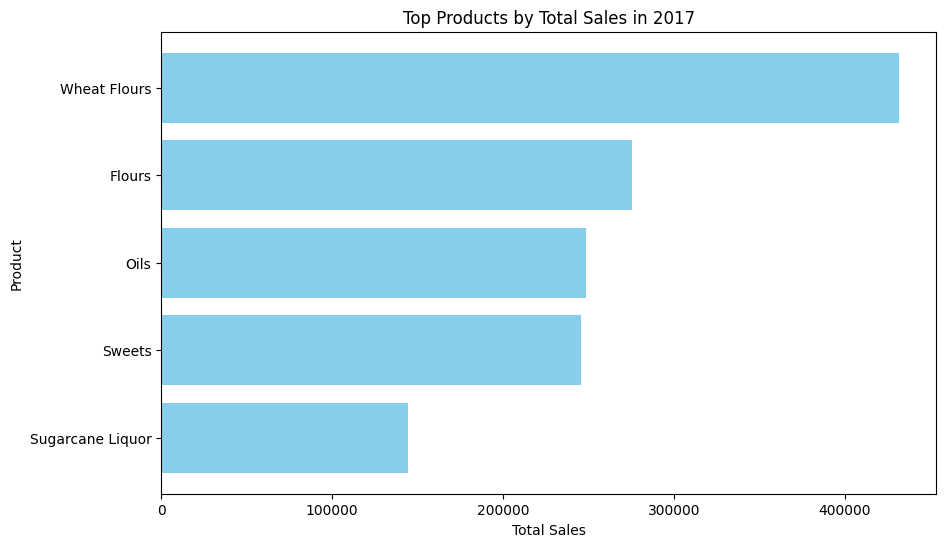

In [124]:

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_products['Group'], top_products_18['Total Sales'], color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.title('Top Products by Total Sales in 2017')
plt.gca().invert_yaxis()  # Invert y-axis to display the product with the highest sales at the top
plt.show()

- the given graph represents the most sold items for the year 2018 i.e; flours,oils,sweet,and sugarcane liquor

- sales_2019

In [125]:
sales_19.rename(columns={'Qty Itens': 'Qty Items'}, inplace=True)
sales_19.head()


,Issue Date,Due Date,Invoice Number,Customer ID,SalesPerson ID,Product ID,Qty Items,Unit Price,Net Weight
0,2019-01-01,2019-02-01,2123073,3785072,285,1154,6,3.25,0.30
1,2019-01-01,2019-02-08,2149604,3799504,326,1154,6,3.25,0.30
2,2019-01-01,2019-02-09,2173654,2957188,326,1154,6,3.20,0.30
3,2019-01-01,2019-01-21,2113210,3854414,326,1154,6,3.33,0.30
4,2019-01-01,2019-01-28,2156463,2950203,102,1154,6,2.62,1.38


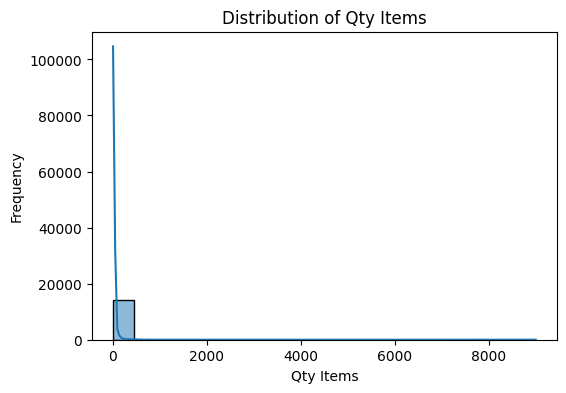

In [126]:
plt.figure(figsize=(6,4))
sns.histplot(sales_19['Qty Items'], bins=20, kde=True)
plt.title('Distribution of Qty Items')
plt.xlabel('Qty Items')
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='Qty Items'>

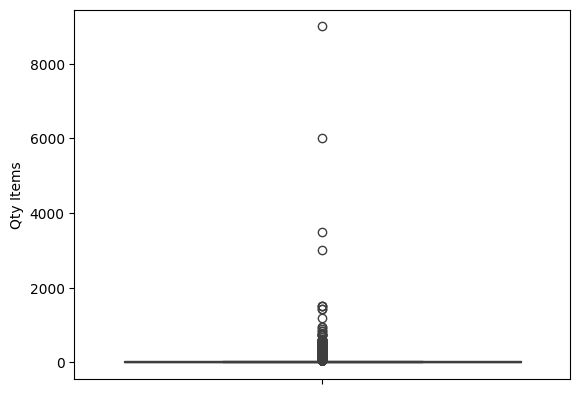

In [127]:
sns.boxplot(sales_19['Qty Items'])

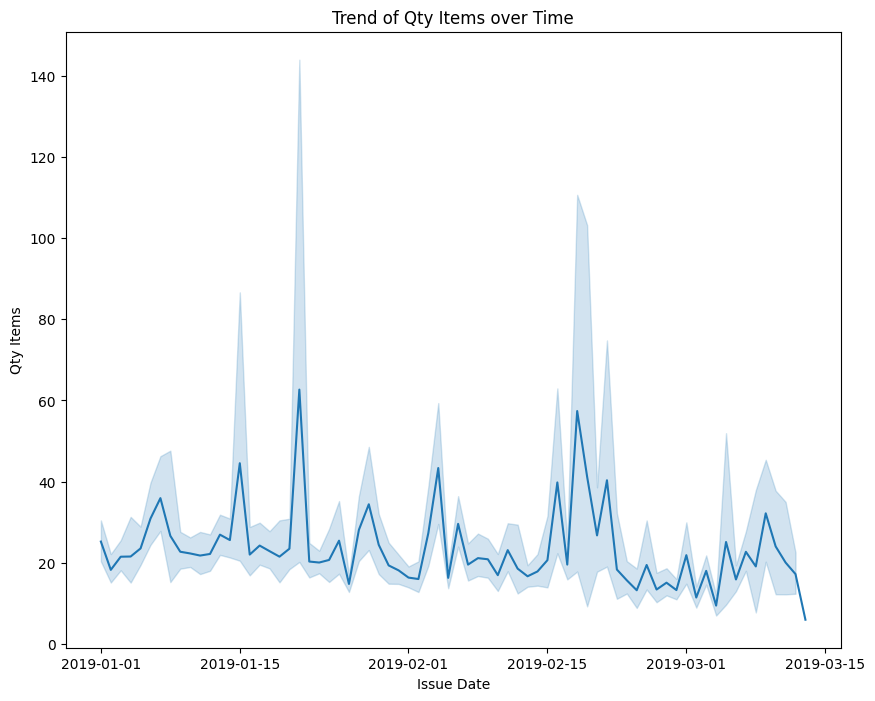

In [128]:
# Visualize trends over time
sales_18['Issue Date'] = pd.to_datetime(sales_19['Issue Date'])
plt.figure(figsize=(10,8))
sns.lineplot(x='Issue Date', y='Qty Items', data=sales_19)
plt.title('Trend of Qty Items over Time')
plt.xlabel('Issue Date')
plt.ylabel('Qty Items')
plt.show()



- graph represents that the sales where high in the month of jan,feb

In [129]:
sales_19['Total Sales'] = sales_19['Qty Items'] * sales_19['Unit Price']
sales_19.head()

,Issue Date,Due Date,Invoice Number,Customer ID,SalesPerson ID,Product ID,Qty Items,Unit Price,Net Weight,Total Sales
0,2019-01-01,2019-02-01,2123073,3785072,285,1154,6,3.25,0.30,19.50
1,2019-01-01,2019-02-08,2149604,3799504,326,1154,6,3.25,0.30,19.50
2,2019-01-01,2019-02-09,2173654,2957188,326,1154,6,3.20,0.30,19.20
3,2019-01-01,2019-01-21,2113210,3854414,326,1154,6,3.33,0.30,19.98
4,2019-01-01,2019-01-28,2156463,2950203,102,1154,6,2.62,1.38,15.72


In [131]:
total_sales_19_by_salesperson = sales_19.groupby('SalesPerson ID')['Total Sales'].sum().reset_index()

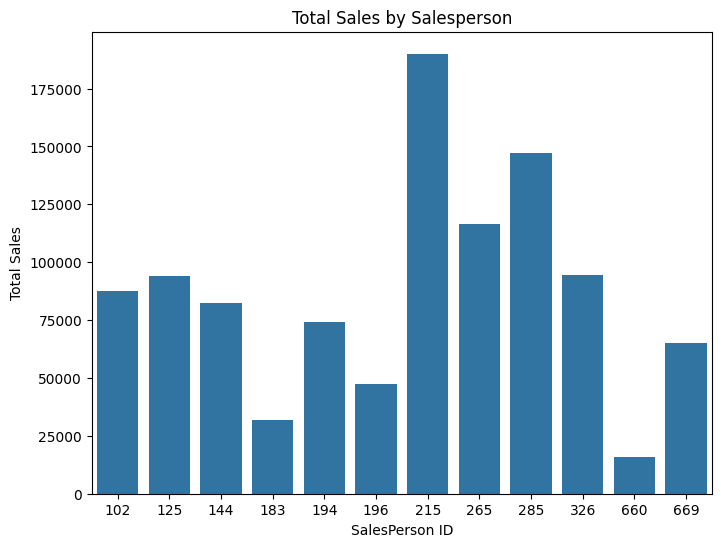

In [132]:
plt.figure(figsize=(8, 6))
sns.barplot(x='SalesPerson ID', y='Total Sales', data=total_sales_19_by_salesperson)
plt.title('Total Sales by Salesperson')
plt.xlabel('SalesPerson ID')
plt.ylabel('Total Sales')
plt.show()

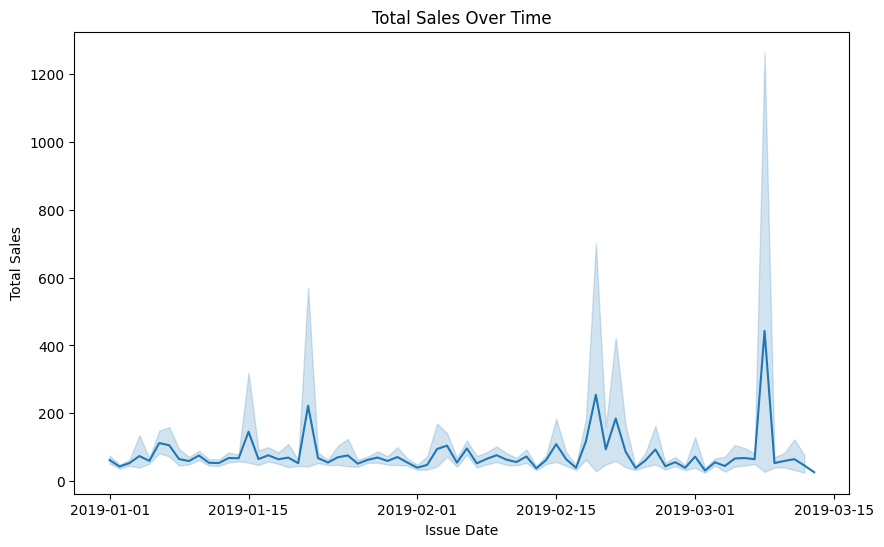

In [133]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_19, x='Issue Date', y='Total Sales')
plt.title('Total Sales Over Time')
plt.xlabel('Issue Date')
plt.ylabel('Total Sales')
plt.show()

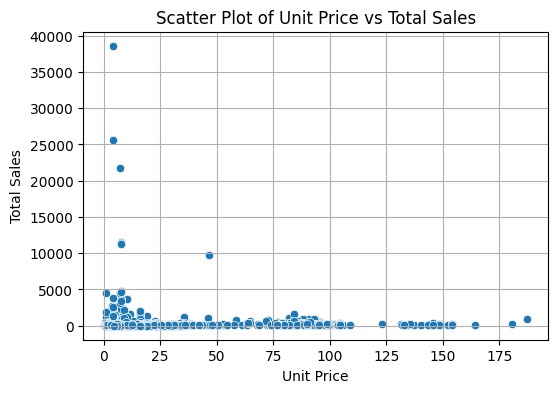

In [134]:
 #Plotting a scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Unit Price', y='Total Sales', data=sales_19)
plt.title('Scatter Plot of Unit Price vs Total Sales')
plt.xlabel('Unit Price')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [139]:
products.head()

,Product ID,Product,Group ID
0,1,Product 1,9999
1,2,Product 2,9999
2,3,Product 3,9999
3,4,Product 4,9999
4,5,Product 5,9999


In [140]:

#merging data on product id
merged_data_19 = pd.merge(sales_19, products, on='Product ID', how='left')


In [141]:

#Calculate total sales for each product
product_sales_19 = merged_data_19.groupby(['Product ID', 'Product', 'Group ID'])['Total Sales'].sum().reset_index()

In [142]:

# Find the product with the highest total sales
most_sold_product_19= product_sales_19.loc[product_sales['Total Sales'].idxmax()]
most_sold_product_19

Product ID             2188
Product        Product 2188
Group ID                103
Total Sales          171.36
Name: 281, dtype: object

In [143]:
most_sold_product_id_19 = most_sold_product_19['Product ID']
most_sold_product_group_19 = most_sold_product_19['Group ID']
print("Most Sold Product:")
print("Product ID:", most_sold_product_id)
print("Group ID:", most_sold_product_group)

Most Sold Product:
Product ID: 2026
Group ID: 118


In [144]:

# Sort the products by total sales in descending order
product_sales_2019 = product_sales_19.sort_values(by='Total Sales', ascending=False)

In [147]:
product_grp.head()

,Group ID,Group,Category
0,102,Powdered Milk,Food
1,103,Sugars,Food
2,104,Canned Sweets,Food
3,105,Flours,Food
4,106,Oils,Food


In [148]:
# Merge with product group data
sales_with_product_and_group_info_19 = pd.merge(product_sales_2019, product_grp, on='Group ID', how='left')

In [149]:
product_sales_2019 = sales_with_product_and_group_info_19.groupby(['Product ID', 'Product', 'Group']).agg({'Total Sales': 'sum'}).reset_index()
# Sort the product_sales_2017 DataFrame in descending order based on Total Sales
product_sales_2019_sorted = product_sales_2019.sort_values(by='Total Sales', ascending=False)
product_sales_2019_sorted

,Product ID,Product,Group,Total Sales
95,845,Product 845,Flours,95294.01
216,1968,Product 1968,Wheat Flours,92724.37
384,2445,Product 2445,Wheat Flours,37581.12
74,662,Product 662,Flours,28554.54
305,2233,Product 2233,Oils,24374.60
...,...,...,...,...
124,1188,Product 1188,Horticulture,19.32
222,1985,Product 1985,Red Sweet Wine,18.06
439,2598,Product 2598,Tomato Sauces,17.62
276,2168,Product 2168,Horticulture,16.83


In [151]:
# Get the top N products with the most sales
top_products_19 = product_sales_2019_sorted.head(10)  # Adjust the number of products as needed
top_products_19

,Product ID,Product,Group,Total Sales
95,845,Product 845,Flours,95294.01
216,1968,Product 1968,Wheat Flours,92724.37
384,2445,Product 2445,Wheat Flours,37581.12
74,662,Product 662,Flours,28554.54
305,2233,Product 2233,Oils,24374.60
2,120,Product 120,Spices,19232.10
21,235,Product 235,Wheat Flours,16011.00
390,2467,Product 2467,Spices,14962.08
358,2392,Product 2392,Sugarcane Liquor,13534.79
321,2272,Product 2272,Wheat Flours,12618.76


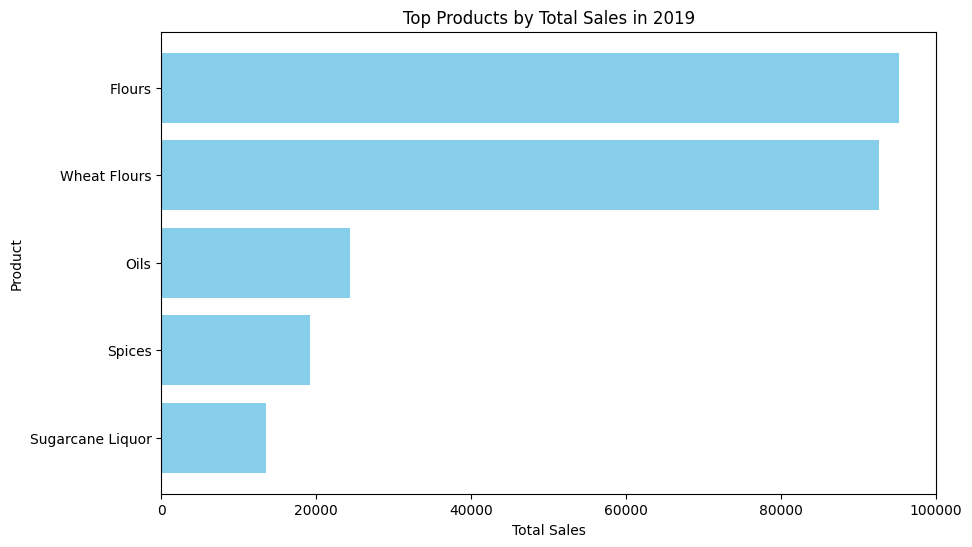

In [152]:
# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_products_19['Group'], top_products_19['Total Sales'], color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.title('Top Products by Total Sales in 2019')
plt.gca().invert_yaxis()  # Invert y-axis to display the product with the highest sales at the top
plt.show()
